#                                     Video Games Sales Analysis 

The “Video Games Sales Analysis And Visualization” project is an in-depth exploration of the global video game industry. Leveraging a comprehensive dataset of video game sales, this project aims to uncover patterns, trends, and insights that can help stakeholders make informed decisions.

The project involves the use of advanced data analysis techniques and visualization tools to interpret the data effectively. It covers various aspects such as sales by region, platform preference, genre popularity, and the impact of critics’ ratings on sales.

By visualizing these data points, the project provides a clear and concise view of the video game market’s dynamics. It serves as a valuable resource for game developers, marketers, and strategists in the gaming industry, helping them understand market trends and consumer preferences.

Whether you’re a game enthusiast curious about market trends or a professional seeking actionable insights, this project offers a fascinating look into the world of video games. Enjoy the journey through data, and happy gaming!

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
data = pd.read_csv('Video_game_Dataset.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.shape

(16598, 11)

Deleted some incomplete data. You can see, from 2016 the data we have those are not fully completed. It will help us to do better analysis. Incomplete data always hamper in analysis

In [4]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

In [5]:
data.shape

(16250, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# Their fields and data types are:

Rank - Ranking of overall sales, integer

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

In [7]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
data.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [9]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

we don't have much missing values

# 1. What genre games have been made the most?

In [10]:
data['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='count'>

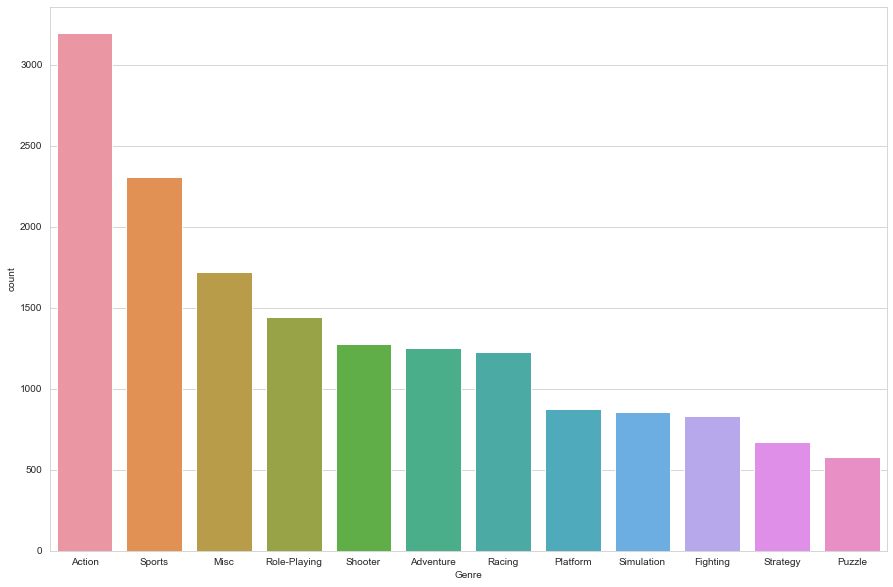

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(x='Genre',data=data, order=data['Genre'].value_counts().index)

Findings= Most of the people love action and sports game. in action 3316 and in sports 2346 games release.

# 2. Which year had the most game release?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1988.0'),
  Text(33, 0, '

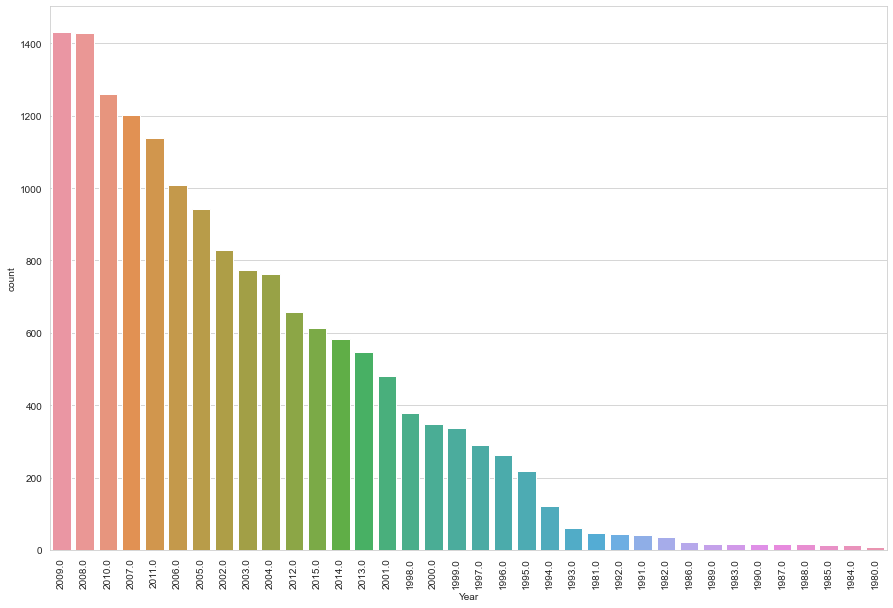

In [12]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

Findings=
- **2009**: 1431 games
- **2008**: 1428 games
- **2010**: 1259 games
- **2007**: 1202 games
- **2011**: 1139 games

2008 to 2010 was most game released

# 3. Top 5 years games release by genre.

<AxesSubplot:xlabel='Year', ylabel='count'>

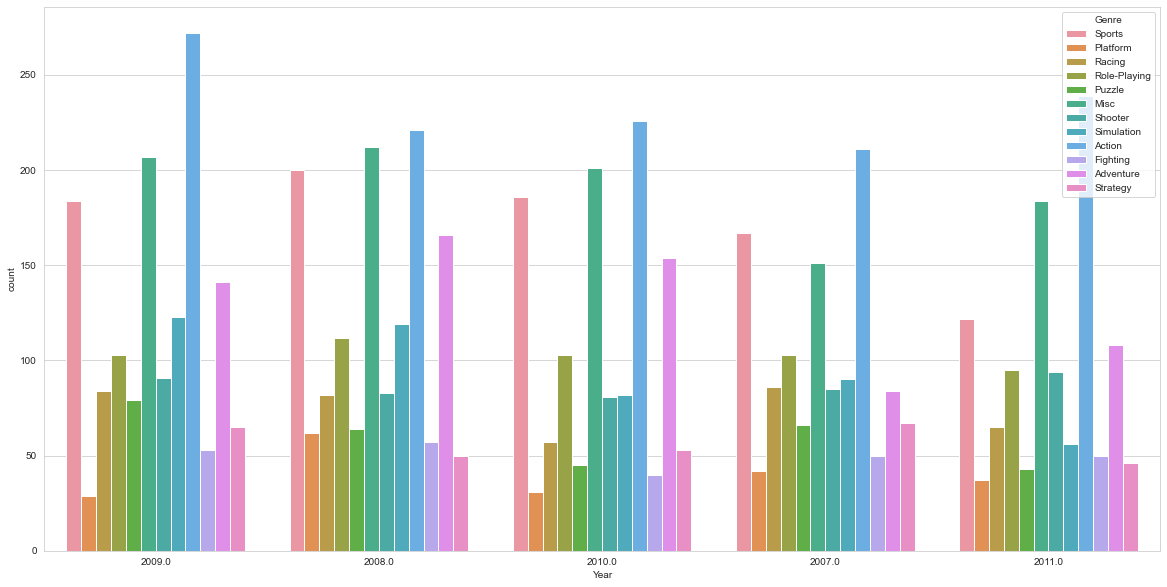

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Year", data=data, hue='Genre',order=data.Year.value_counts().iloc[:5].index)

# 4. Which year had the highest sales worldwide?

In [14]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
data_year.sort_values(by=['Global_Sales'], ascending=False)

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04
31,2011.0,515.99
25,2005.0,459.94
24,2004.0,419.31
22,2002.0,395.52
33,2013.0,368.11


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

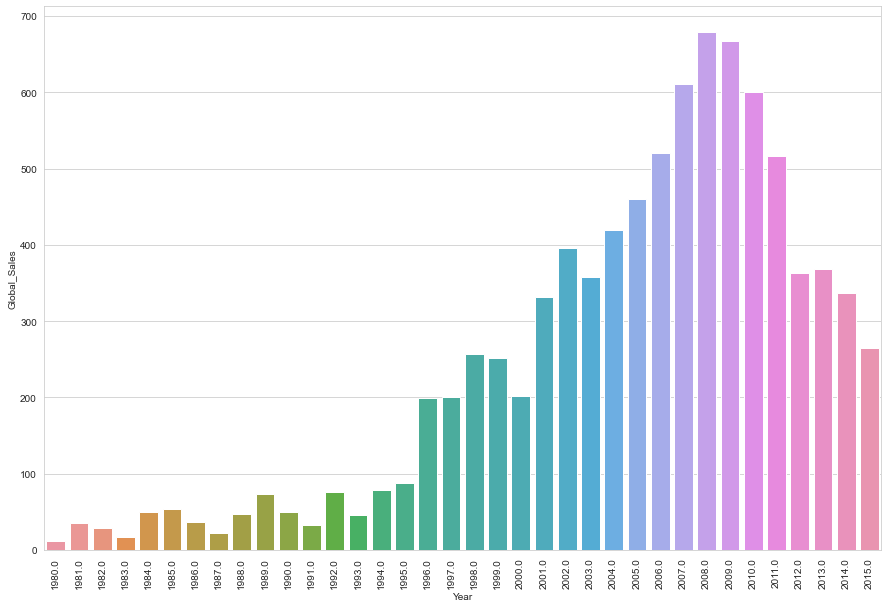

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Year', y='Global_Sales', data=data_year)
plt.xticks(rotation=90)

Findings=

- **2008**: 678.90 
- **2009**: 667.30 
- **2007**: 611.13 
- **2010**: 600.45 
- **2006**: 521.04 

**2006** was not among the top 5 years in terms of game releases, it ranks in the top 5 for highest global sales.

# 5. Which genre game has been released the most in a single year?

In [16]:
year_max_df = data.groupby(['Year','Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'],keep='last').reset_index(drop=True)

In [17]:
genre = year_max_genre['Genre'].values

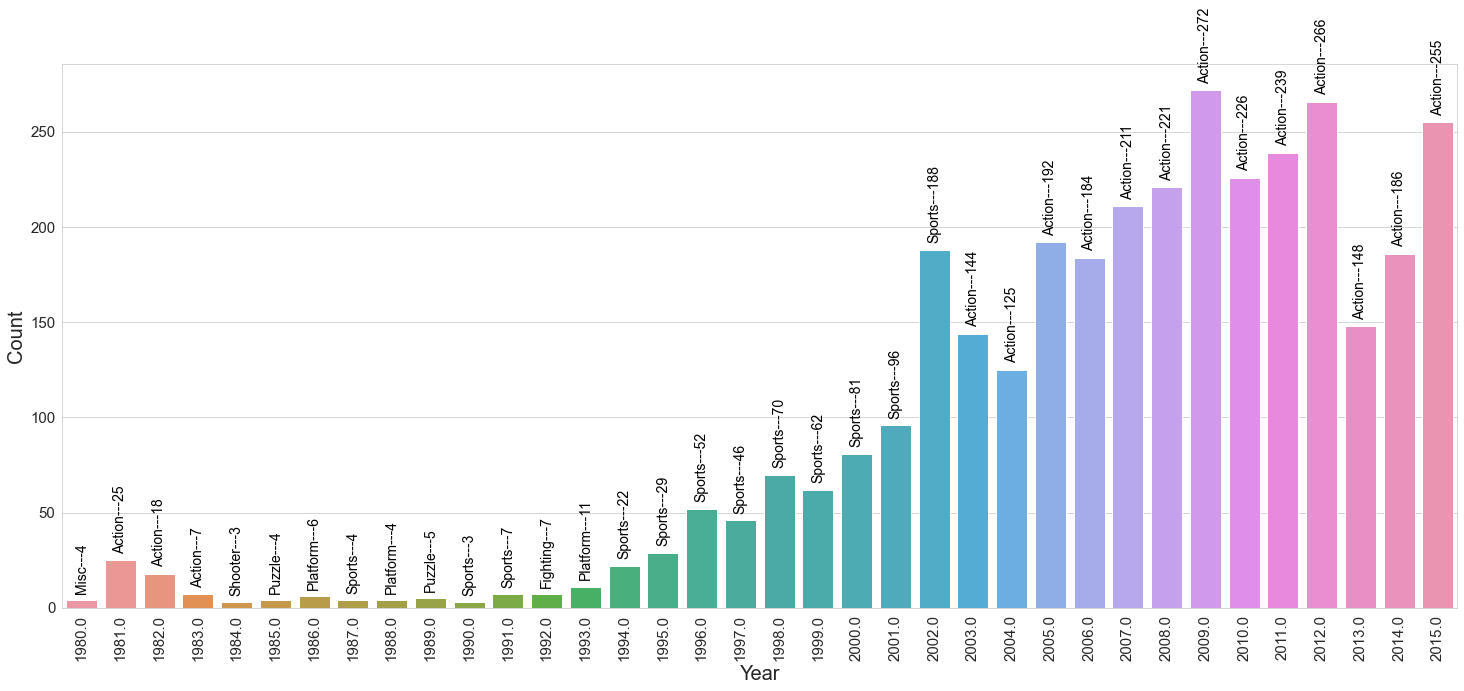

In [18]:
plt.figure(figsize=(25, 10))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0

for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '---' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1
    
plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

Findings=

- **2009**: 272 
- **2012**: 266 


# 6. Which genre game has sold the most in a single year?

In [19]:
year_sale_df = data.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_df.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_df['Global_Sales']
year_sale_max = year_sale_df[year_sale].reset_index(drop=True)
#year_sale_max

In [20]:
genre = year_sale_max['Genre']

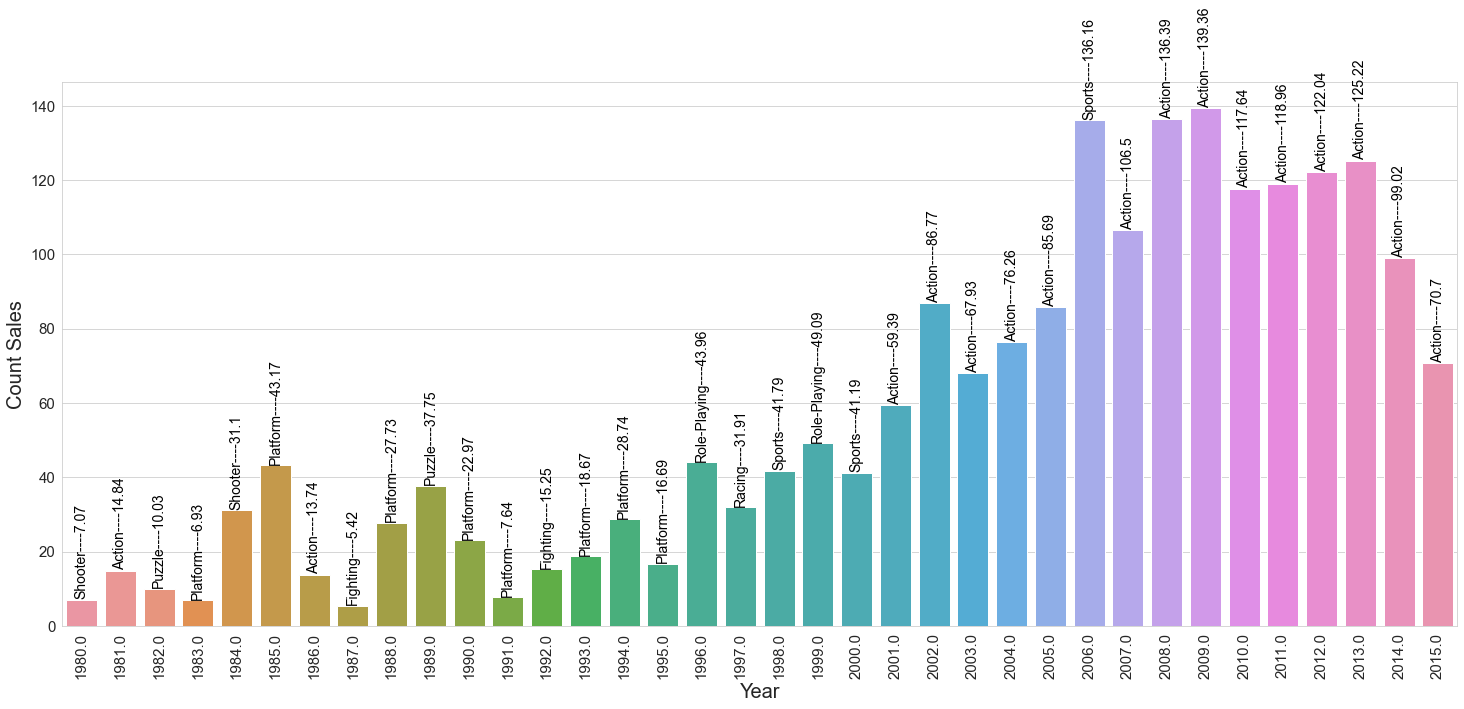

In [21]:
plt.figure(figsize=(25, 10))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count Sales', fontsize=20)
plt.show()

Findings=

- **2009 Action**: 139.36 million 
- **2008 Action**: 136.39 miliion

# 7. Which genre game have the highest sale price globally

In [22]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

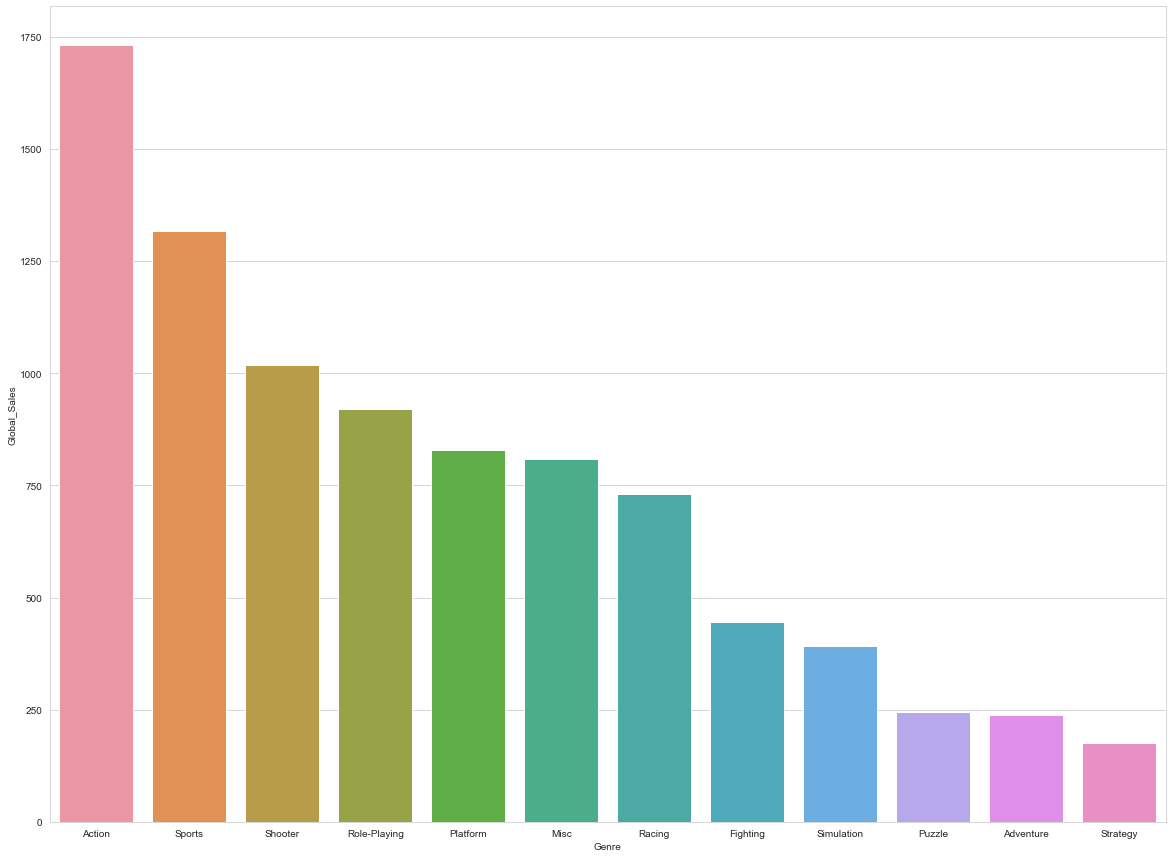

In [23]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Genre',y='Global_Sales', data=data_genre)

Action and Sports are most highest sale price globally

# 8. Which platfrom have the highest sale price globally

In [24]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

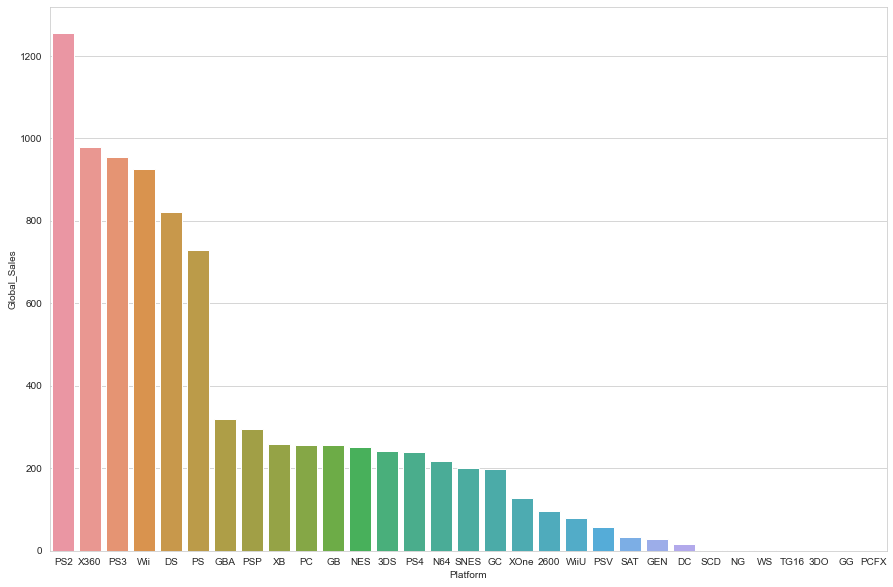

In [25]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)

Finding = 
**PS2**

# 9. Which individual game have the highest sale price globally?

In [26]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
#top_game_sale

In [27]:
name = top_game_sale['Name']
year = top_game_sale['Year']

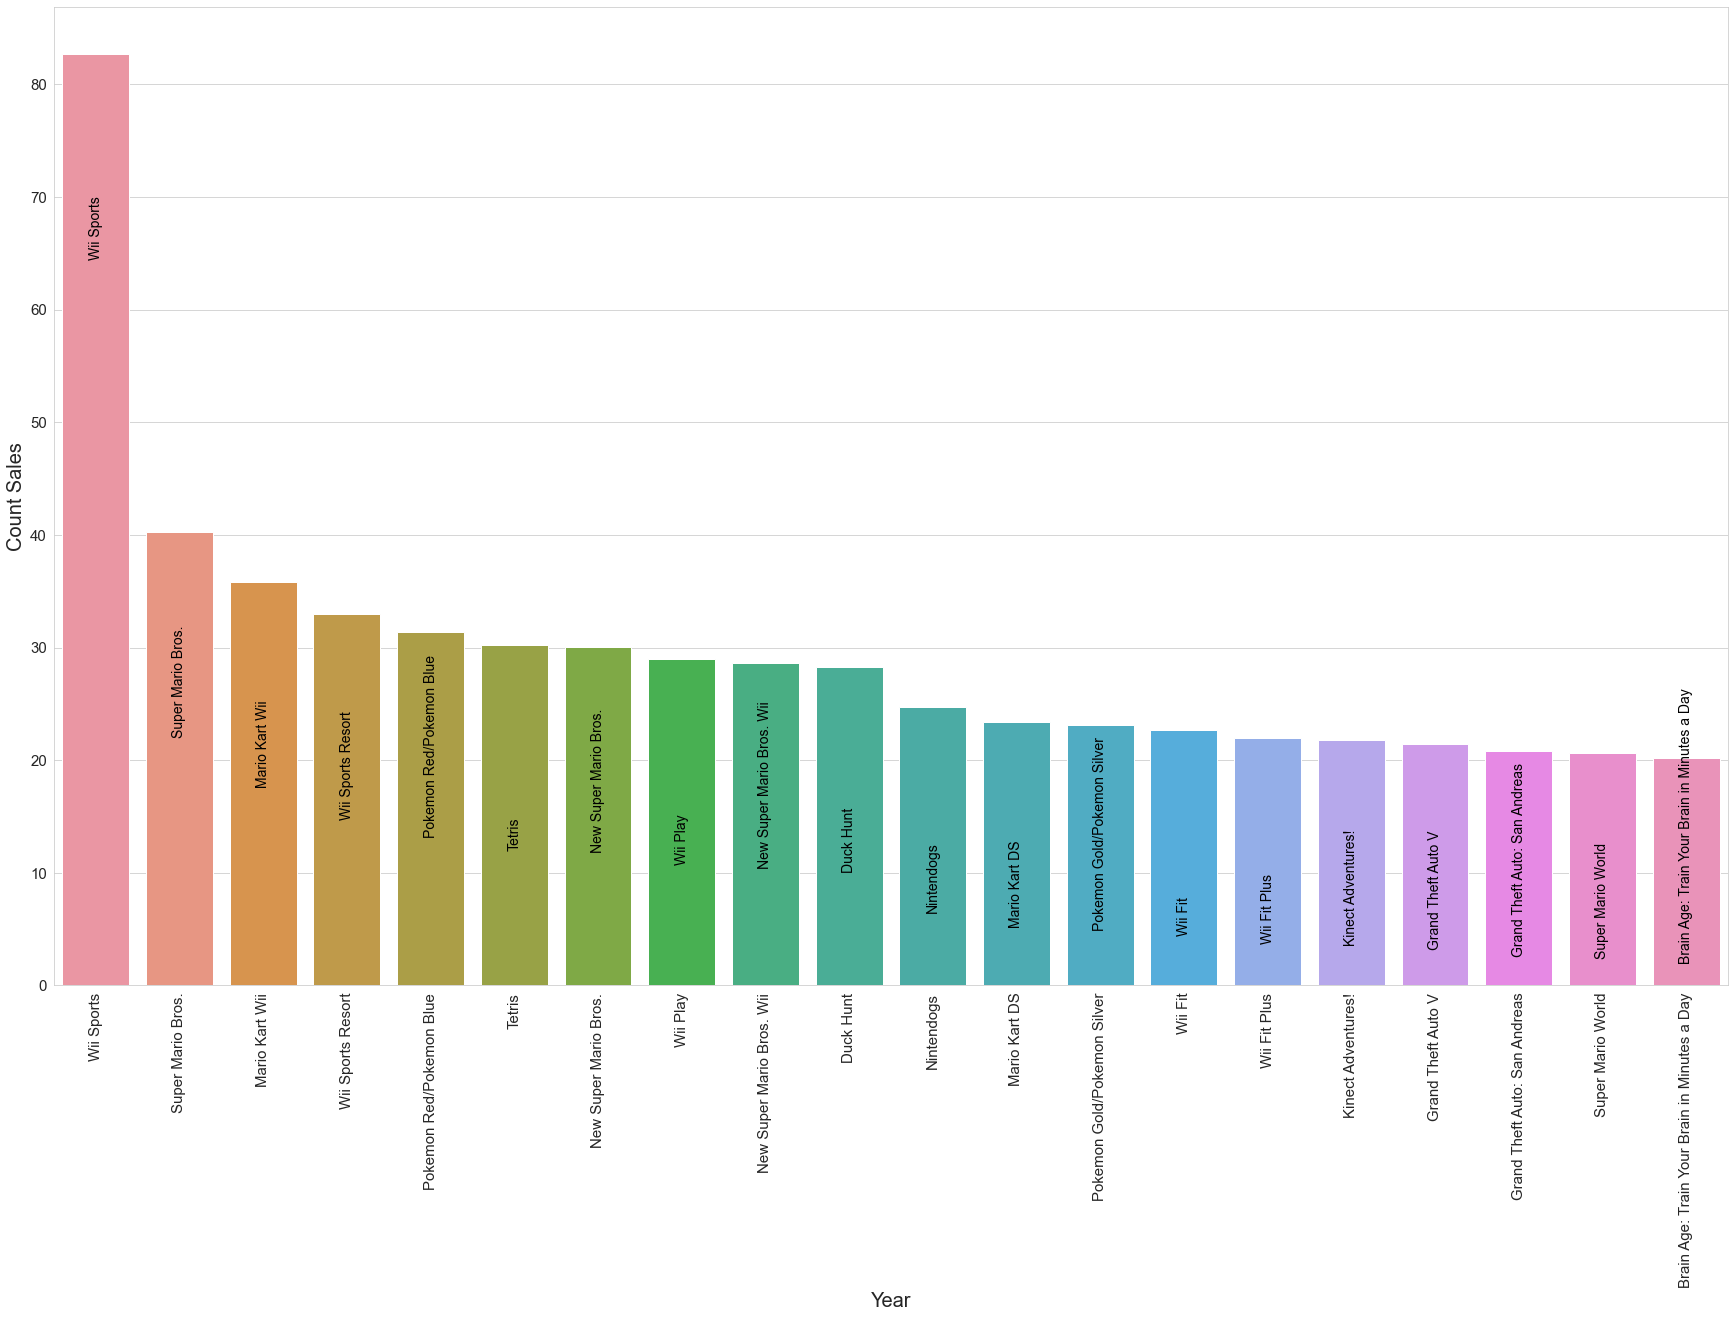

In [28]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count Sales', fontsize=20)
plt.show()

Finding = 
**Wii Sports** is the individual game have the highest sale price globally

# 10. Sales compearison by genre

In [29]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
#comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
#comp_map

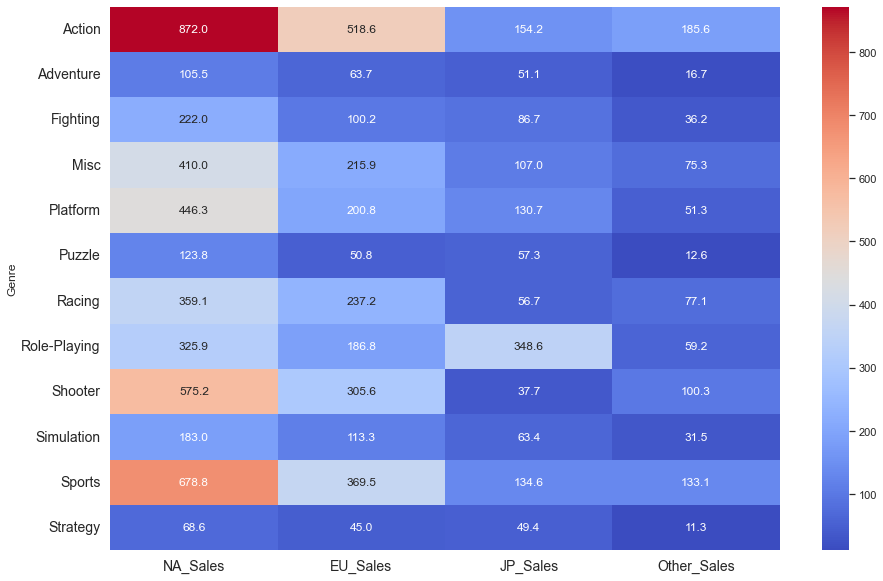

In [30]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)

sns.heatmap(comp_map, annot=True, fmt='.1f', cmap='coolwarm')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [31]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


<AxesSubplot:xlabel='Genre', ylabel='Sale_Price'>

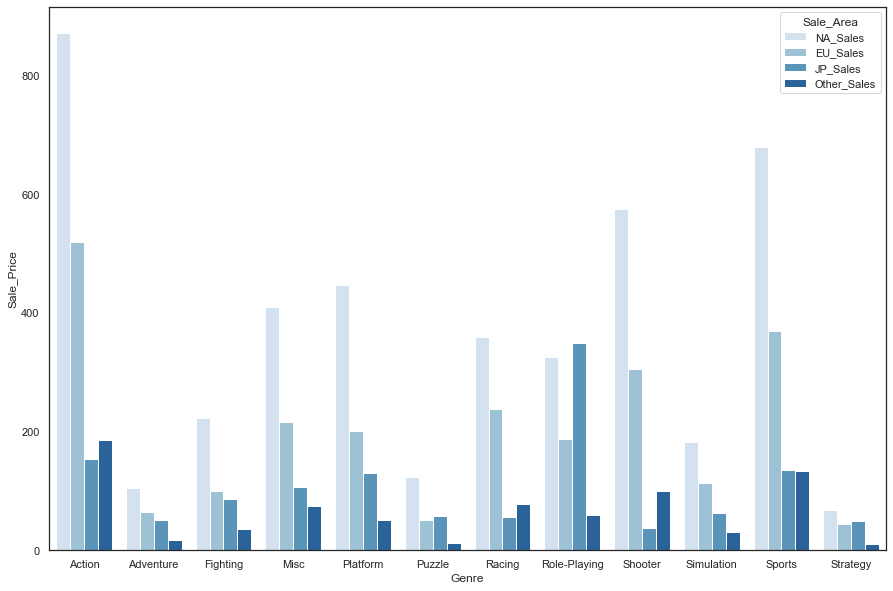

In [32]:
plt.figure(figsize=(15, 10))
sns.set_style('white')


sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table, palette="Blues")

Finding=

**Action** , **Sports** and **Shooter** have much sales compare with others. and North America (NA_sales) have heights sales all the time.

# 11. Sales compearison by platform

In [33]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [34]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [35]:
#comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


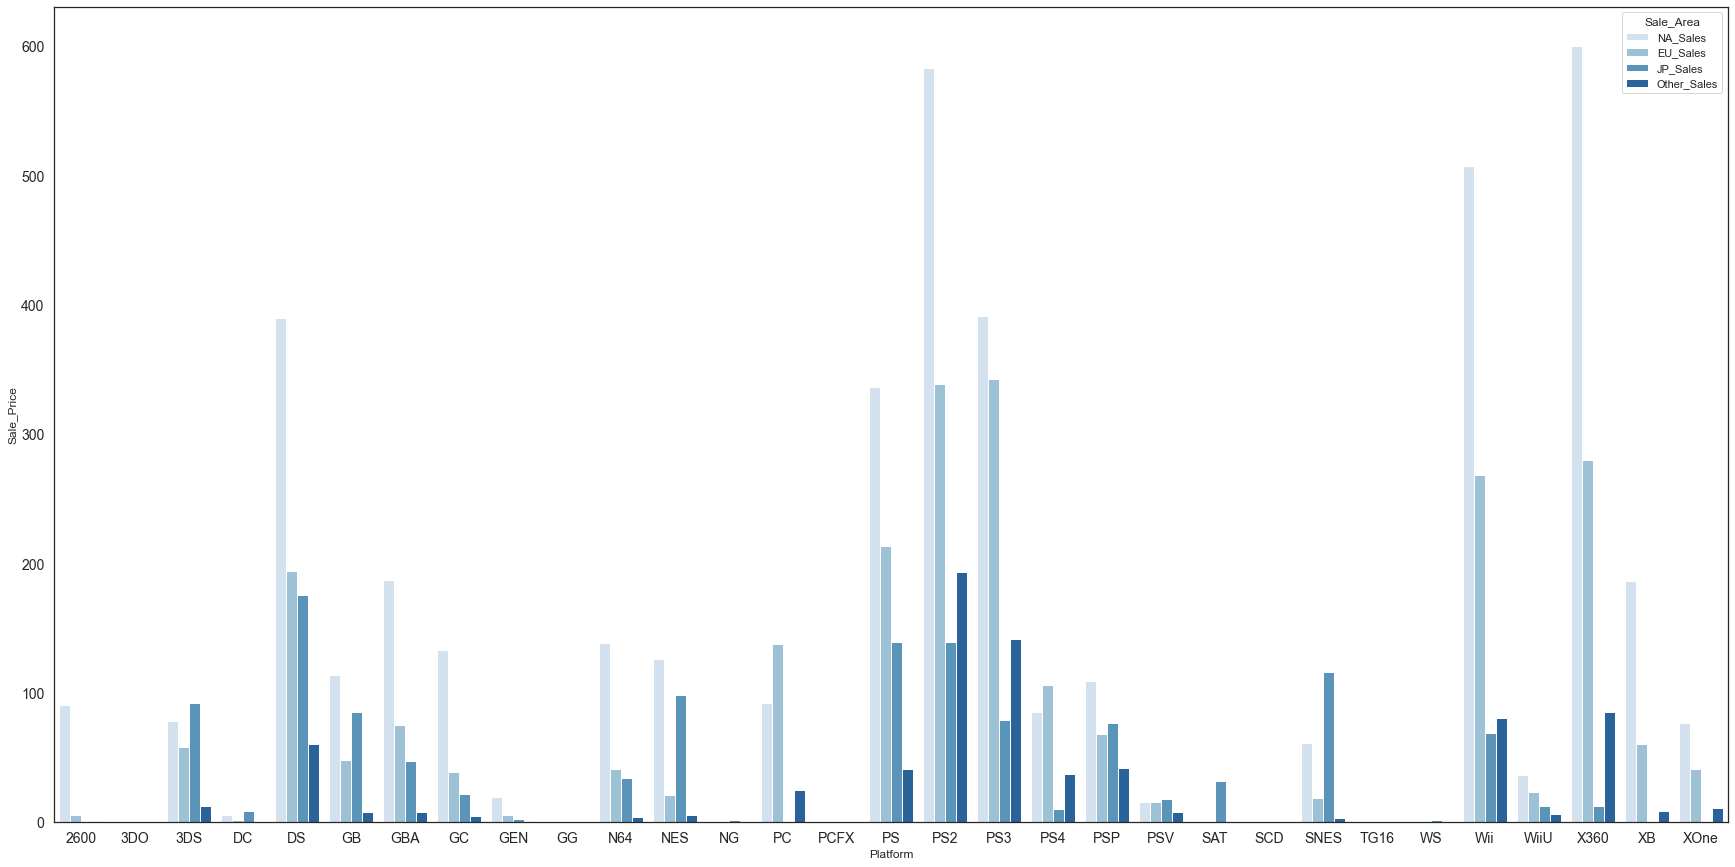

In [36]:
plt.figure(figsize=(30, 15))
sns.set_style('white')

sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table, palette="Blues")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**X360**, **Wii**, and **PS** series are market leader and North Americas Sales is performing good

# 12. Top 20 Publisher

In [37]:
top_publishers = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False)
top_publishers = pd.DataFrame(top_publishers).reset_index()
#top_publishers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

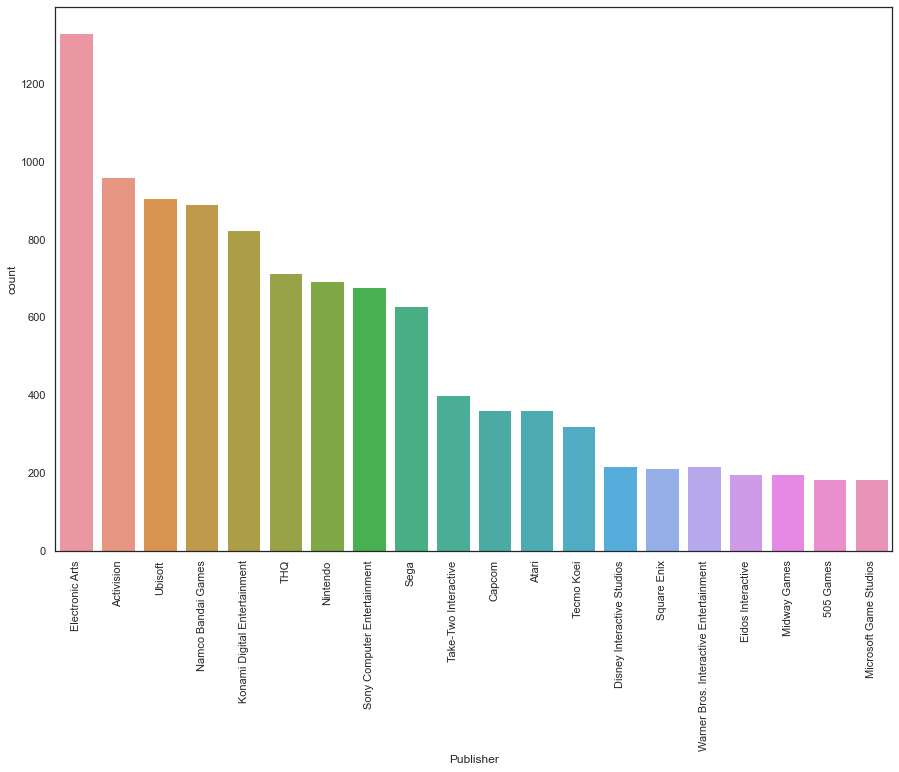

In [38]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

Finding= 

**Electronic Arts(EA Sports)** : 1339

# 13. Top global sales by publisher

In [39]:
sale_publisher = data[['Publisher', 'Global_Sales']]
sale_publisher = sale_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_publisher = pd.DataFrame(sale_publisher).reset_index()
#sale_publisher

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

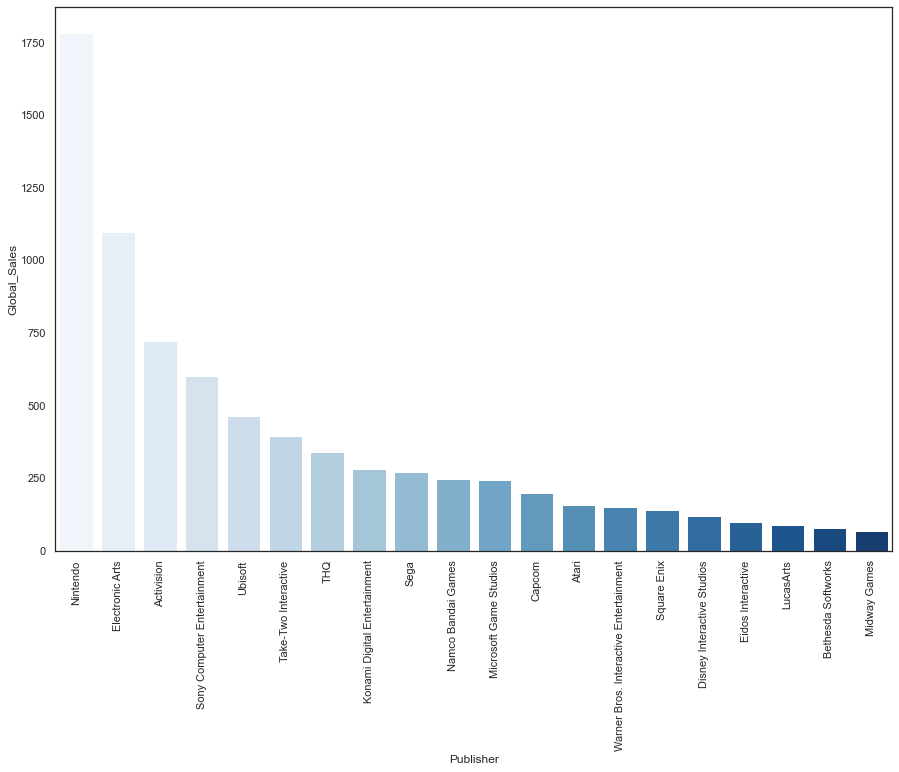

In [40]:
plt.figure(figsize=(15, 10))
sns.set_style('white')

sns.barplot(x = 'Publisher', y = 'Global_Sales', data = sale_publisher, palette="Blues")


plt.xticks(rotation=90)

Despite not being a top 5 publisher, **Nintendo’s** focus on quality over quantity has led to their financial success. With **696** high-quality games

# 14. Publisher comperison

In [41]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [42]:
comp_publisher = comp_publisher.groupby(by = ['Publisher']).sum().reset_index().sort_values(by = ['Global_Sales'], ascending= False)
comp_publisher = comp_publisher.head(20)
#comp_publisher

In [43]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                         var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,9.87


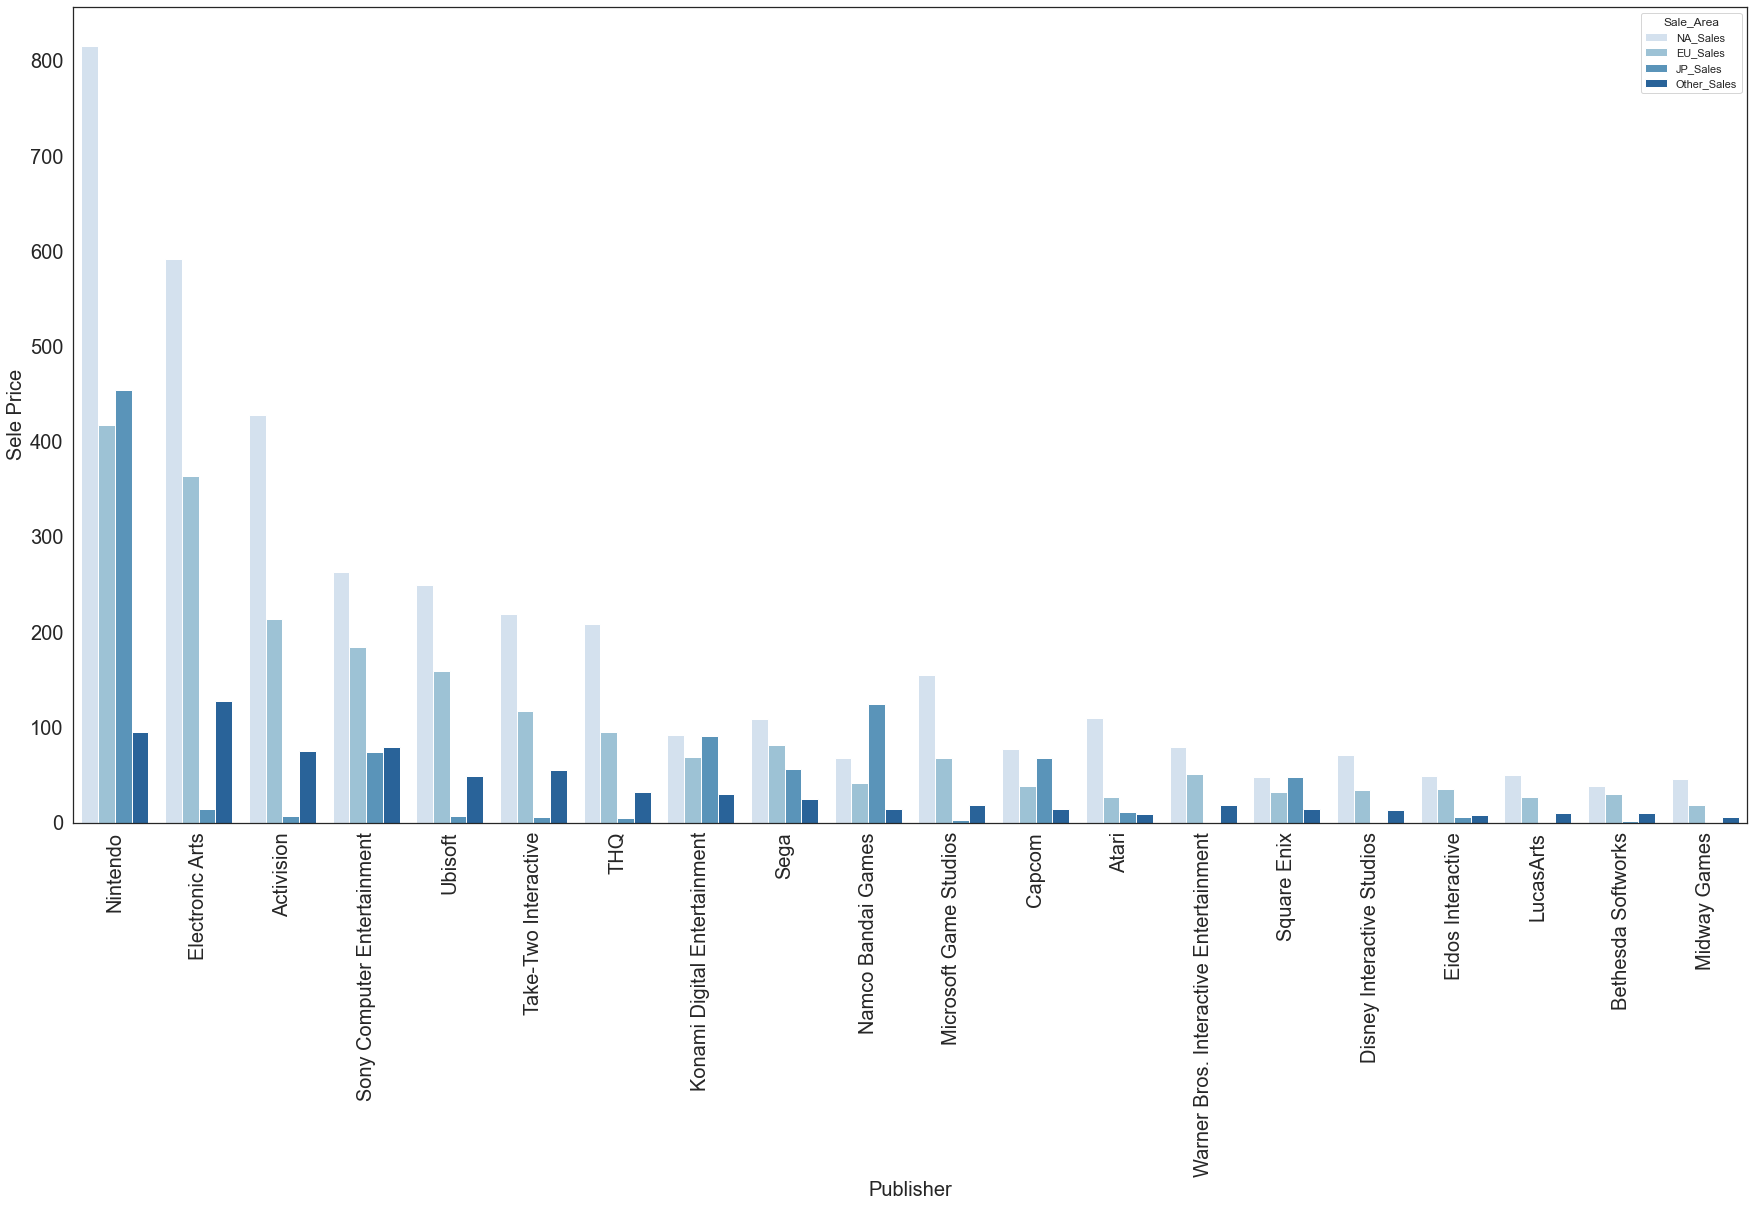

In [44]:
plt.figure(figsize=(30, 15))
sns.set_style('white')

sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher,palette="Blues")
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Publisher', fontsize=20)
plt.ylabel('Sele Price', fontsize=20)
plt.show()

# 15. Top publisher by Count each year

In [45]:
top_publisher = data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year','Publisher']).size().reset_index(name='Count')
top_publisher_idx = top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count = top_publisher_count.drop_duplicates(subset=['Year','Count'],keep='last').reset_index(drop=True)
#top_publisher_count

In [46]:
publisher= top_publisher_count['Publisher']

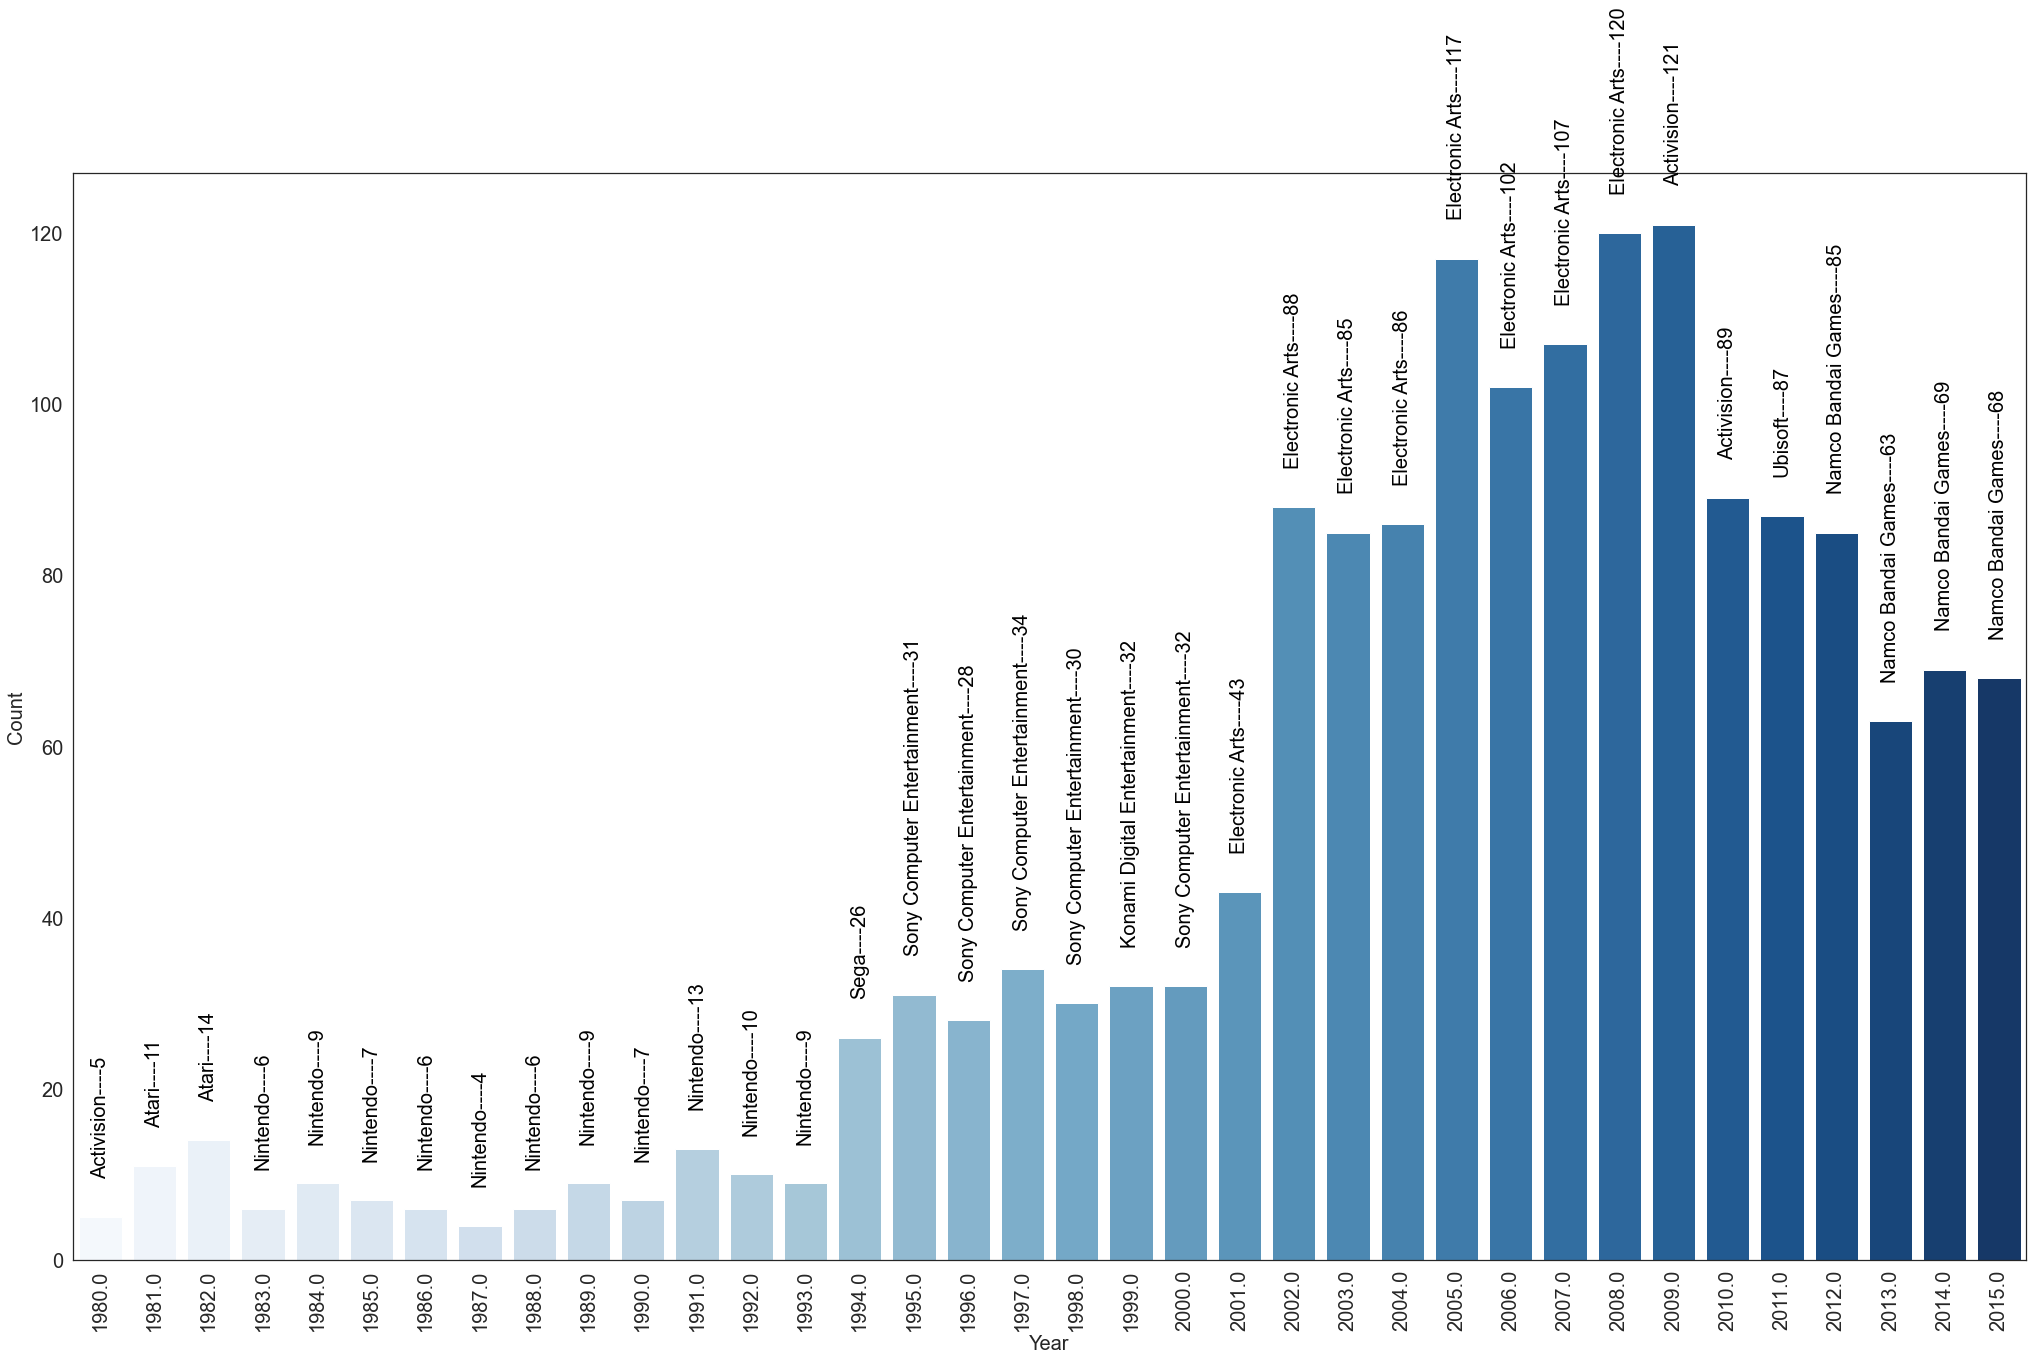

In [47]:
plt.figure(figsize=(35, 20))
sns.set_style('white')

g = sns.barplot(x='Year', y='Count', data=top_publisher_count, palette="Blues")
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=20, rotation= 90, ha="center")
    index += 1


plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()


# 16. Total revenue by region

In [48]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


<AxesSubplot:xlabel='region', ylabel='sale'>

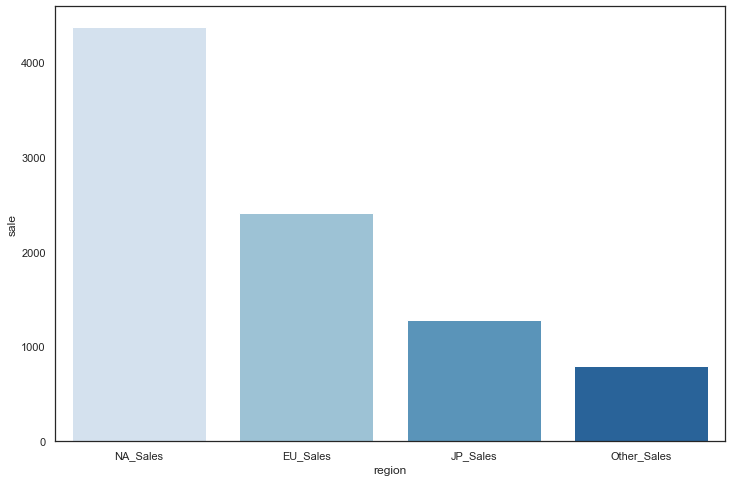

In [49]:
plt.figure(figsize=(12, 8))
sns.set_style('white')

sns.barplot(x='region', y='sale', data = top_sale_reg, palette="Blues")

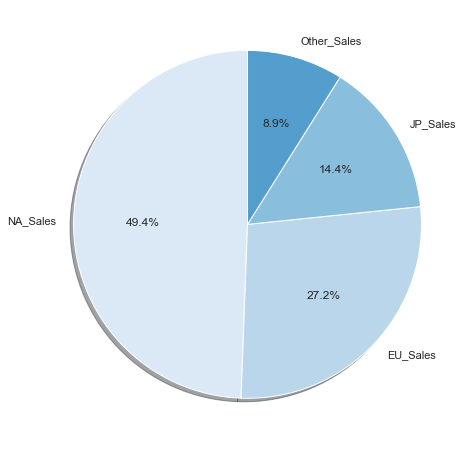

In [50]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

# Get the 'Blues' color palette
colors = sns.color_palette('Blues')

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.show()

Findings=

**North America** almost Cover **50%** of sales

# 17. Sales Histogram

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

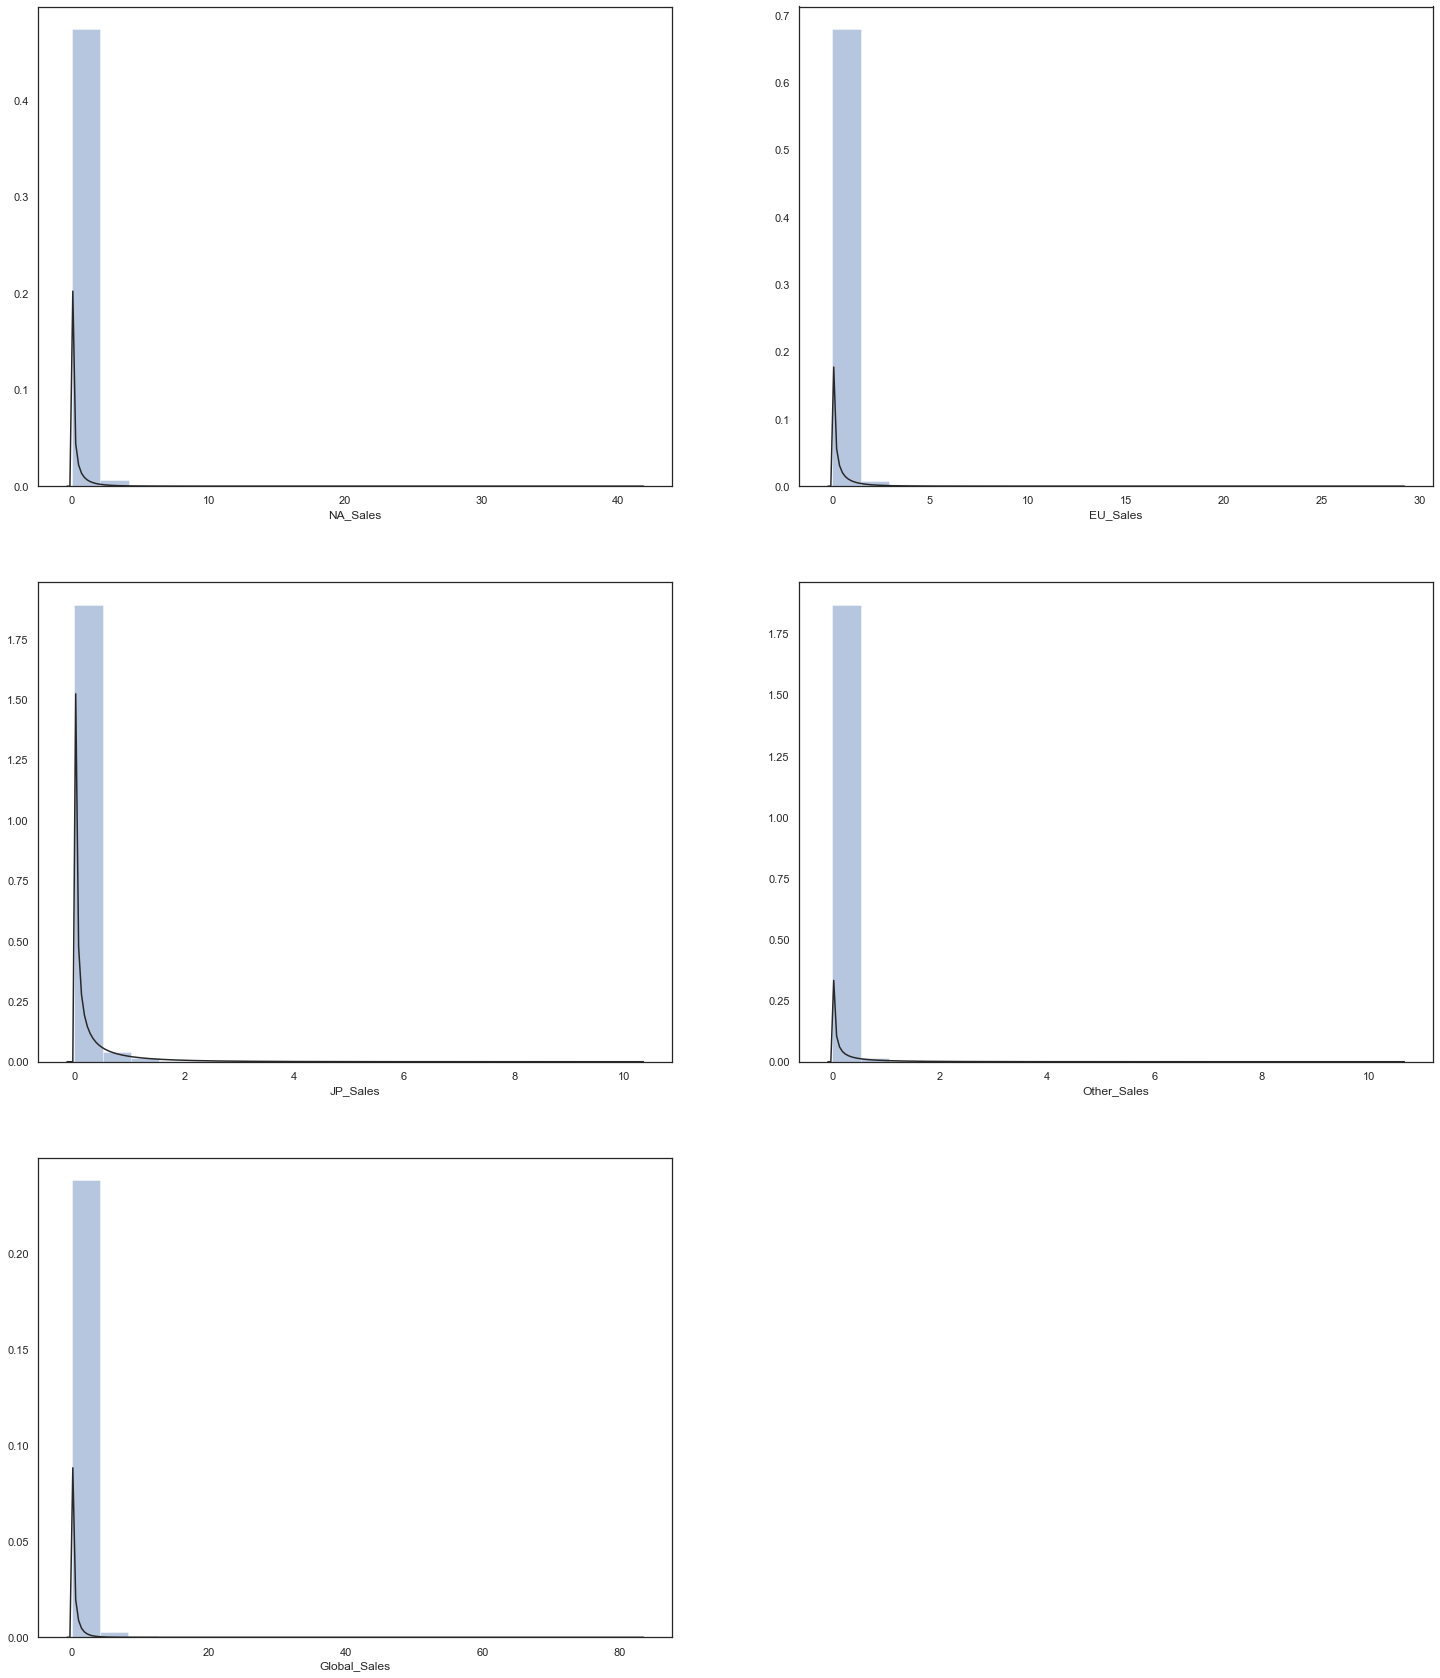

In [51]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

# ------------------------------Thank you for staying with us -----------------------------------